<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Seminar #1: Inroduction into Time Series Analysis

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h3> Plan </h3>
  * **Remind: Regression**
  * **Autoregression Model**
  * **HW** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sc
import statsmodels as sm

%matplotlib inline

<h1 align="center"> Remind: Regression </h1>

In [2]:
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#examples-using-sklearn-linear-model-linearregression", width=800, height=400)

In [3]:
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge", width=800, height=400)

## Underfitting VS Overfitting

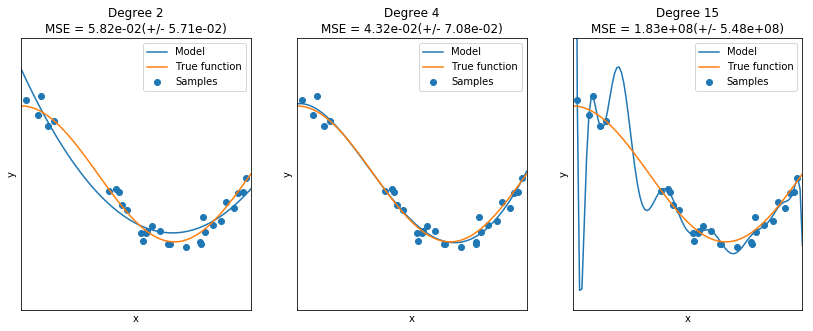

In [4]:
np.random.seed(0)

n_samples = 30
degrees = [2, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X) # ещё один способ определить функцию: с помощью lambda-функции

# Data Generation
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    
    # Evaluate the models using crossvalidation
    scores = model_selection.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

<h1 align="center"> Autoregression</h1>

## Data: energy consumption

In [5]:
# Caution: different version of pandas needs differnt codes!!!
# ts = pd.read_csv('consumption_train.csv', sep='\t', decimal=',')
ts = pd.read_csv('consumption_train.csv', sep='\t', decimal='.', parse_dates=True, dayfirst=False, index_col='Dates') 
ts.head(24)

,EnergyCons,Dev,WeekDay
Dates,,,
2005-01-01 00:00:00,1290,-11,6
2005-01-01 01:00:00,1266,-12,6
2005-01-01 02:00:00,1273,-13,6
2005-01-01 03:00:00,1280,-14,6
2005-01-01 04:00:00,1293,-15,6
2005-01-01 05:00:00,1263,-16,6
2005-01-01 06:00:00,1279,-16,6
2005-01-01 07:00:00,1304,-16,6
2005-01-01 08:00:00,1330,-16,6


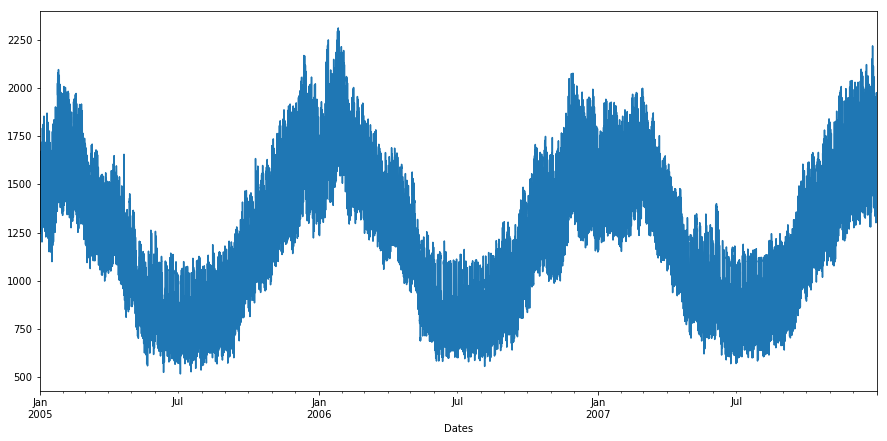

In [6]:
# Plot time series
ts['EnergyCons'].plot(figsize=(15,7))

C:\Users\AM000110\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


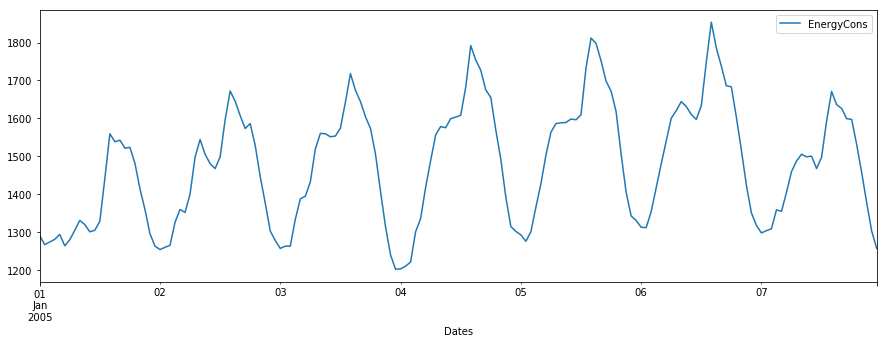

In [7]:
# the first week
ts.ix['2005-01-01 00:00:00':'2005-01-07 23:00:00', range(1)].plot(figsize=(15,5))

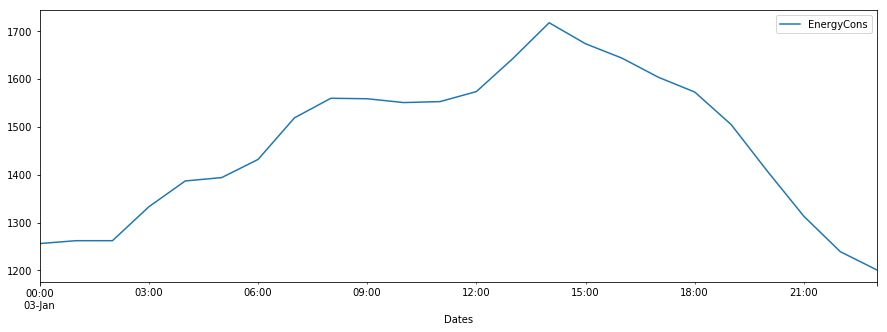

In [8]:
# the first day
ts.ix['2005-01-03 00:00:00':'2005-01-03 23:00:00', range(1)].plot(figsize=(15,5))

## STL-decomposition

In [9]:
import statsmodels.api as sm

C:\Users\AM000110\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\Users\AM000110\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


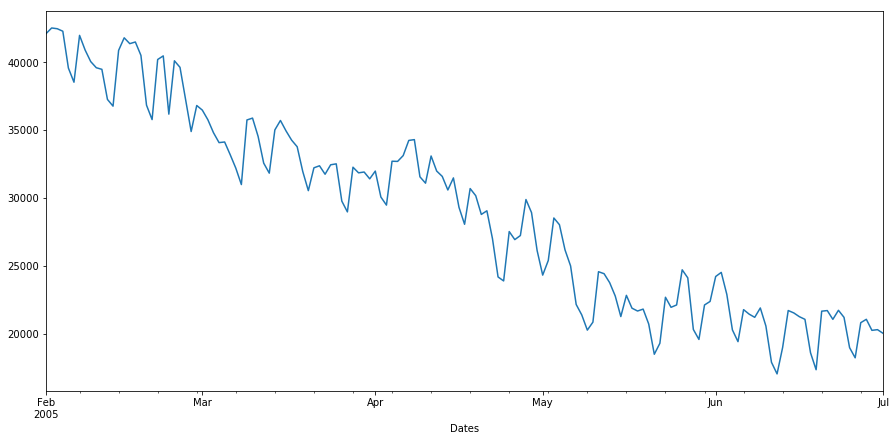

In [10]:
daily_cons = ts['EnergyCons'].ix['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum()
daily_cons.plot(figsize=(15,7))

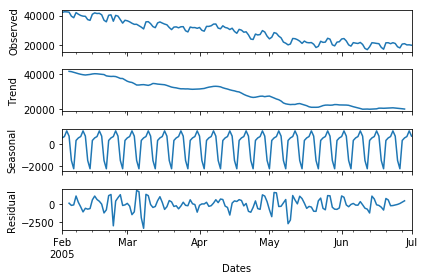

In [11]:
res = sm.tsa.seasonal_decompose(daily_cons)
resplot = res.plot()

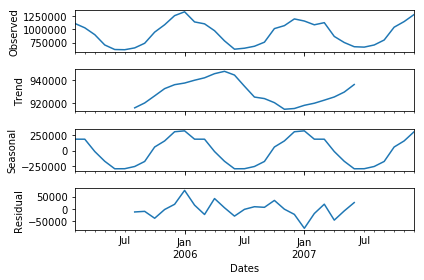

In [12]:
# fig = plt.figure(figsize=(15,10))
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].ix['2005-02-01 00:00':'2008-01-01 23:00'].resample("M").sum())
resplot = res.plot()

## Autoregression: build matrix of autoregression

In [13]:
sc.linalg.hankel([1,2,3,4], [7,7,8,9])

array([[1, 2, 3, 4],
       [2, 3, 4, 7],
       [3, 4, 7, 8],
       [4, 7, 8, 9]])

In [14]:
def get_autoregrmatrix(x,h,K):
    L = len(x)
    X = sc.linalg.hankel(x[:L-h-K+1], np.hstack((x[-K],x[-K:-1])))
    y = x[K+h-1:]
    return X,y

In [15]:
a = np.arange(10)
get_autoregrmatrix(a,1,4)


(array([[0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6],
        [4, 5, 6, 7],
        [5, 6, 7, 8]]), array([4, 5, 6, 7, 8, 9]))

## Forecast for next hour (h=1) using 1 week history (K=168)

In [16]:
K=168
h = 1 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

In [17]:
# print(x_train)
print(x_train[:len(x_train)-K].shape)
print(x_train[-K:])
print(x_train.shape)

(8593,)
Dates
2005-12-25 01:00:00    1235
2005-12-25 02:00:00    1222
2005-12-25 03:00:00    1278
2005-12-25 04:00:00    1362
2005-12-25 05:00:00    1469
2005-12-25 06:00:00    1575
2005-12-25 07:00:00    1600
2005-12-25 08:00:00    1630
2005-12-25 09:00:00    1629
2005-12-25 10:00:00    1626
2005-12-25 11:00:00    1610
2005-12-25 12:00:00    1618
2005-12-25 13:00:00    1738
2005-12-25 14:00:00    1850
2005-12-25 15:00:00    1889
2005-12-25 16:00:00    1848
2005-12-25 17:00:00    1818
2005-12-25 18:00:00    1759
2005-12-25 19:00:00    1656
2005-12-25 20:00:00    1542
2005-12-25 21:00:00    1444
2005-12-25 22:00:00    1378
2005-12-25 23:00:00    1332
2005-12-26 00:00:00    1293
2005-12-26 01:00:00    1256
2005-12-26 02:00:00    1281
2005-12-26 03:00:00    1448
2005-12-26 04:00:00    1680
2005-12-26 05:00:00    1844
2005-12-26 06:00:00    1951
                       ... 
2005-12-30 19:00:00    1682
2005-12-30 20:00:00    1586
2005-12-30 21:00:00    1484
2005-12-30 22:00:00    1401
2005-1

In [18]:
print (X_train.shape)
print (y_train.shape)

(8593, 168)
(8593,)


In [19]:
x_train

Dates
2005-01-01 00:00:00    1290
2005-01-01 01:00:00    1266
2005-01-01 02:00:00    1273
2005-01-01 03:00:00    1280
2005-01-01 04:00:00    1293
2005-01-01 05:00:00    1263
2005-01-01 06:00:00    1279
2005-01-01 07:00:00    1304
2005-01-01 08:00:00    1330
2005-01-01 09:00:00    1319
2005-01-01 10:00:00    1300
2005-01-01 11:00:00    1304
2005-01-01 12:00:00    1328
2005-01-01 13:00:00    1441
2005-01-01 14:00:00    1559
2005-01-01 15:00:00    1538
2005-01-01 16:00:00    1542
2005-01-01 17:00:00    1521
2005-01-01 18:00:00    1523
2005-01-01 19:00:00    1481
2005-01-01 20:00:00    1414
2005-01-01 21:00:00    1359
2005-01-01 22:00:00    1295
2005-01-01 23:00:00    1262
2005-01-02 00:00:00    1253
2005-01-02 01:00:00    1259
2005-01-02 02:00:00    1264
2005-01-02 03:00:00    1325
2005-01-02 04:00:00    1359
2005-01-02 05:00:00    1351
                       ... 
2005-12-30 19:00:00    1682
2005-12-30 20:00:00    1586
2005-12-30 21:00:00    1484
2005-12-30 22:00:00    1401
2005-12-30 23:

In [20]:
# Matrix of Samples and Regressors
X_train[0][:24]

array([1290, 1266, 1273, 1280, 1293, 1263, 1279, 1304, 1330, 1319, 1300,
       1304, 1328, 1441, 1559, 1538, 1542, 1521, 1523, 1481, 1414, 1359,
       1295, 1262], dtype=int64)

In [21]:
# Target Vector
y_train

Dates
2005-01-08 00:00:00    1257
2005-01-08 01:00:00    1267
2005-01-08 02:00:00    1274
2005-01-08 03:00:00    1339
2005-01-08 04:00:00    1376
2005-01-08 05:00:00    1400
2005-01-08 06:00:00    1439
2005-01-08 07:00:00    1504
2005-01-08 08:00:00    1557
2005-01-08 09:00:00    1518
2005-01-08 10:00:00    1500
2005-01-08 11:00:00    1501
2005-01-08 12:00:00    1546
2005-01-08 13:00:00    1645
2005-01-08 14:00:00    1718
2005-01-08 15:00:00    1701
2005-01-08 16:00:00    1655
2005-01-08 17:00:00    1635
2005-01-08 18:00:00    1616
2005-01-08 19:00:00    1530
2005-01-08 20:00:00    1435
2005-01-08 21:00:00    1349
2005-01-08 22:00:00    1266
2005-01-08 23:00:00    1247
2005-01-09 00:00:00    1227
2005-01-09 01:00:00    1252
2005-01-09 02:00:00    1250
2005-01-09 03:00:00    1298
2005-01-09 04:00:00    1355
2005-01-09 05:00:00    1384
                       ... 
2005-12-30 19:00:00    1682
2005-12-30 20:00:00    1586
2005-12-30 21:00:00    1484
2005-12-30 22:00:00    1401
2005-12-30 23:

Train score: 0.997, Test score: 0.991


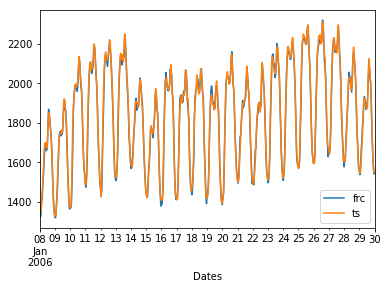

In [22]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot()

## Try another delay: h=168

Train score: 0.933, Test score: 0.839


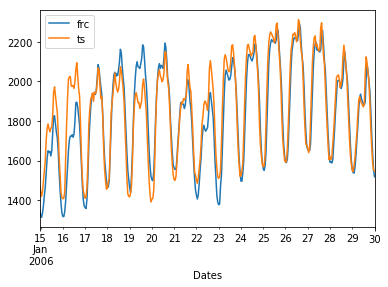

In [23]:
K=168
h = 168 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot()

<h1 align="center"> Home Work 0</h1>

## Answer to questions 
  ** 1. What is time series? **
     
     Time series is the Sequence of values of some variable, detected in a   constant time interval.
       
  ** 2. What is delay and horizon of forecast?**
        
     Delay of time series is the period a head, for which we are doing      forecast.Hoizon is maximum forecasting period.
         
  ** 3. What is Least Squared Method for Linear Regression?**
  
     Least Square Method is the method, where the loss function is defined  as a squared difference of Regression model predictions and real       values.
          
  ** 4. What is the solution of linear regression via LS method (in terms of matrix $X, \alpha, Y$)? **
     
$$\alpha=(XX^T)^{-1}X^TY$$
          
  ** 5. Write down main problems of LS method. **
  
     1) last sample and first sample in train set have the same weight
     2) LR needs a lot of machine resoures

          
  ** 6. What hankel transformation of a matrix? **
  
     Hankel matrix is a square matrix in which each ascending skew-diagonal from left to right is constant. The Hankel transform is the 
     transformation of a sequence, where the transformed sequence 
     corresponds to the determinant of the Hankel matrix. 
          

## Practical Task
Draw dependence of the cross_validation score (linear_regression.score) on the horizon of the forecast for LR model in the case of energy consumption forecasting. You should write code to show dependence for $h=1,2,\dots, 720$. You can choose amount of regressors fo LR in experiment as much as you want.   

In [24]:
K=168
h = 168 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-01-30 00:00:00']

scores = []
for h in range(1,720):

    X_train, y_train = get_autoregrmatrix(x_train,h,K)
    X_test, y_test = get_autoregrmatrix(x_test,h,K)
    linear_regression = LinearRegression()
    linear_regression.fit(X_train,y_train)
    scores.append(linear_regression.score(X_train, y_train))


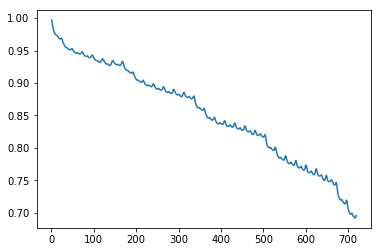

In [25]:
plt.plot(range(1,720),scores)